In [1]:
import numpy as np
import xarray as xr
import copy 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec

plot_path = '/home/u/u241308/figures/'

In [2]:
ref_hist_min = 1850
ref_hist_max = 1879

# For MPI

#Historical
path = '/work/uo1075/u241308/grand_ensemble_cmip6/tas/ens1_30/' #first 30 members
file = 'nGE_GMT_HIST_ym.nc'
GMT_hist_1 = xr.open_dataset(path+file)
GMT_hist_1 = GMT_hist_1.tas

path = '/work/uo1075/u241308/grand_ensemble_cmip6/tas/ens31_50/' #second 20 members
file = 'nGE_GMT_HIST_ym.nc'
GMT_hist_2 = xr.open_dataset(path+file)
GMT_hist_2 = GMT_hist_2.tas

GMT_hist = xr.concat((GMT_hist_1,GMT_hist_2),'height') #concatenate 50 members
GMT_hist_mean = GMT_hist.mean(axis=(1,2,3)) #average over ensemble members and lon/lat (non existent)
GMT_hist_ens = GMT_hist.mean(axis=(2,3)) #average over lon/lat (non existent)

GMT_ref = GMT_hist_mean[(GMT_hist_mean.time.dt.year>=ref_hist_min)&(GMT_hist_mean.time.dt.year<=ref_hist_max)].mean()
GMT_ref_ens = GMT_hist_ens[(GMT_hist_ens.time.dt.year>=ref_hist_min)&(GMT_hist_ens.time.dt.year<=ref_hist_max)].mean(axis=0)

#ssp245
path = '/work/uo1075/u241308/grand_ensemble_cmip6/tas/ens1_30/' #first 30 members
file = 'nGE_GMT_ssp245_ym.nc'
GMT_ssp245_1 = xr.open_dataset(path+file)
GMT_ssp245_1 = GMT_ssp245_1.tas

path = '/work/uo1075/u241308/grand_ensemble_cmip6/tas/ens31_50/' #second 20 members
file = 'nGE_GMT_ssp245_ym.nc'
GMT_ssp245_2 = xr.open_dataset(path+file)
GMT_ssp245_2 = GMT_ssp245_2.tas

GMT_ssp245 = xr.concat((GMT_ssp245_1,GMT_ssp245_2),'height') #concatenate 50 members
GMT_ssp245_mean = GMT_ssp245.mean(axis=(1,2,3)) #average over ensemble members and lon/lat (non existent)
GMT_ssp245_ens = GMT_ssp245.mean(axis=(2,3)) #average over lon/lat (non existent)

#ssp585
path = '/work/uo1075/u241308/grand_ensemble_cmip6/tas/ens1_30/' #first 30 members
file = 'nGE_GMT_ssp585_ym.nc'
GMT_ssp585_1 = xr.open_dataset(path+file)
GMT_ssp585_1 = GMT_ssp585_1.tas

path = '/work/uo1075/u241308/grand_ensemble_cmip6/tas/ens31_50/' #second 20 members
file = 'nGE_GMT_ssp585_ym.nc'
GMT_ssp585_2 = xr.open_dataset(path+file)
GMT_ssp585_2 = GMT_ssp585_2.tas

GMT_ssp585 = xr.concat((GMT_ssp585_1,GMT_ssp585_2),'height') #concatenate 50 members
GMT_ssp585_mean = GMT_ssp585.mean(axis=(1,2,3)) #average over ensemble members and lon/lat (non existent)
GMT_ssp585_ens = GMT_ssp585.mean(axis=(2,3)) #average over lon/lat (non existent)

#compute anomalies for ensemble mean
GMTA_hist_mean = GMT_hist_mean - GMT_ref
GMTA_ssp245_mean = GMT_ssp245_mean - GMT_ref
GMTA_ssp585_mean = GMT_ssp585_mean - GMT_ref

out_data_GMTA = []
#out_data_GMTA.append(GMTA_historical_mean)
out_data_GMTA.append(GMTA_ssp245_mean)
out_data_GMTA.append(GMTA_ssp585_mean)

# ---------------- SOIL MOISTURE -----------------------

run = ['ssp245','ssp585']
lon_eu_max = 30
lon_eu_min = -10
lat_eu_max = 70
lat_eu_min = 35

sm_mean_ens_mean_all = []
sm_mean_ens_std_all = []

for n_run in run:
    #first set
    path = '/work/uo1075/u241308/grand_ensemble_cmip6/soil_moisture/ens1_30/'
    file = 'nGE_soil_moisture_'+n_run+'_dm_ens1-30.nc'
    sm1 = xr.open_dataset(path+file)
    sm1 = sm1.mrso
    
    sm1_mean = sm1[(sm1.time.dt.month >= 6) & (sm1.time.dt.month <= 8)].resample(time='Y').mean()
    
    #Define new longitudes: from 0,360 to -180,180, and select Europe
    sm1_mean['lon'] = np.where(sm1_mean.lon >180, sm1_mean.lon-360,sm1_mean.lon)
    ind = np.argsort(sm1_mean.lon)
    ind.values
    sm1_mean = sm1_mean[:,:,:,ind.values]

    #sel lon/lat
    sm1_mean = sm1_mean[:,:,(sm1_mean.lat >= lat_eu_min) & (sm1_mean.lat <= lat_eu_max),(sm1_mean.lon >= lon_eu_min) & (sm1_mean.lon <= lon_eu_max)]
    
    #second set
    path = '/work/uo1075/u241308/grand_ensemble_cmip6/soil_moisture/ens31_50/'
    file = 'nGE_soil_moisture_'+n_run+'_dm_ens31-50.nc'
    sm2 = xr.open_dataset(path+file)
    sm2 = sm2.mrso
    
    sm2_mean = sm2[(sm2.time.dt.month >= 6) & (sm2.time.dt.month <= 8)].resample(time='Y').mean()
    
    #Define new longitudes: from 0,360 to -180,180
    sm2_mean['lon'] = np.where(sm2_mean.lon >180, sm2_mean.lon-360,sm2_mean.lon)
    ind = np.argsort(sm2_mean.lon)
    ind.values
    sm2_mean = sm2_mean[:,:,:,ind.values]

    #sel lon/lat
    sm2_mean = sm2_mean[:,:,(sm2_mean.lat >= lat_eu_min) & (sm2_mean.lat <= lat_eu_max),(sm2_mean.lon >= lon_eu_min) & (sm2_mean.lon <= lon_eu_max)]
    
    #concatenate two sets
    sm_mean = xr.concat((sm1_mean,sm2_mean),dim='sfc')
    
    #ensemble mean
    sm_mean_ens_mean = sm_mean.mean(dim='sfc')
    sm_mean_ens_mean_all.append(sm_mean_ens_mean)

    #Ensemble spread
    sm_mean_ens_std = sm_mean.std(dim='sfc')
    sm_mean_ens_std_all.append(sm_mean_ens_std)

    print('Run '+n_run+' finished')

x_regress_data_mpi = np.concatenate((np.array(out_data_GMTA[0]),np.array(out_data_GMTA[1])))
# for summer mean
y_regress_mean_mean_mpi = np.concatenate((np.array(sm_mean_ens_mean_all[0]),np.array(sm_mean_ens_mean_all[1])))
y_regress_mean_std_mpi = np.concatenate((np.array(sm_mean_ens_std_all[0]),np.array(sm_mean_ens_std_all[1])))

# Compute sm and GMTA rest of SMILES

#Use CDO for regridding soil moisture data to MPI-GE grid
#cdo -remapbil,MPI_GE_grid.txt in_file_original.nc out_file_GEgrid.nc

model_list = ['MIROC6','ACCESS-ESM1-5','CanESM5']
ens_total_list = [50,40,50]

def compute_sm(model,ens_total):
    #Historical
    path = '/work/uo1075/u241308/SMILE/'+model+'/tas/' #first 30 members
    file = model+'_GMT_historical_mm.nc'
    GMT_hist = xr.open_dataset(path+file)
    GMT_hist = GMT_hist.tas
    
    #yearly mean
    GMT_hist = GMT_hist.resample(time='Y').mean()
    
    #compute mean
    GMT_hist_mean = GMT_hist.mean(axis=(1,2,3)) #average over ensemble members and lon/lat (non existent)
    GMT_hist_ens = GMT_hist.mean(axis=(2,3)) #average over lon/lat (non existent)
    
    GMT_ref = GMT_hist_mean[(GMT_hist_mean.time.dt.year>=ref_hist_min)&(GMT_hist_mean.time.dt.year<=ref_hist_max)].mean()
    GMT_ref_ens = GMT_hist_ens[(GMT_hist_ens.time.dt.year>=ref_hist_min)&(GMT_hist_ens.time.dt.year<=ref_hist_max)].mean(axis=0)
    
    #ssp245
    path = '/work/uo1075/u241308/SMILE/'+model+'/tas/' #first 30 members
    file = model+'_GMT_ssp245_mm.nc'
    GMT_ssp245 = xr.open_dataset(path+file)
    GMT_ssp245 = GMT_ssp245.tas
    
    #yearly mean
    GMT_ssp245 = GMT_ssp245.resample(time='Y').mean()
    
    GMT_ssp245_mean = GMT_ssp245.mean(axis=(1,2,3)) #average over ensemble members and lon/lat (non existent)
    GMT_ssp245_ens = GMT_ssp245.mean(axis=(2,3)) #average over lon/lat (non existent)

    #ssp585
    path = '/work/uo1075/u241308/SMILE/'+model+'/tas/' #first 30 members
    file = model+'_GMT_ssp585_mm.nc'
    GMT_ssp585 = xr.open_dataset(path+file)
    GMT_ssp585 = GMT_ssp585.tas
    
    #yearly mean
    GMT_ssp585 = GMT_ssp585.resample(time='Y').mean()
    
    #compute mean
    GMT_ssp585_mean = GMT_ssp585.mean(axis=(1,2,3)) #average over ensemble members and lon/lat (non existent)
    GMT_ssp585_ens = GMT_ssp585.mean(axis=(2,3)) #average over lon/lat (non existent)
    
    #compute anomalies for ensemble mean
    GMTA_historical_mean = GMT_hist_mean - GMT_ref
    GMTA_ssp245_mean = GMT_ssp245_mean - GMT_ref
    GMTA_ssp585_mean = GMT_ssp585_mean - GMT_ref
    
    out_data_GMTA = []
    #out_data_GMTA.append(GMTA_historical_mean)
    out_data_GMTA.append(GMTA_ssp245_mean)
    out_data_GMTA.append(GMTA_ssp585_mean)
    
    run = ['ssp245','ssp585']
    lon_eu_max = 30
    lon_eu_min = -10
    lat_eu_max = 70
    lat_eu_min = 35

    sm_mean_ens_mean_all = []
    sm_mean_ens_std_all = []
    sm_10pct_ens_mean_all = []
    sm_10pct_ens_std_all = []

    for n_run in run:
        #first set
        path = '/work/uo1075/u241308/SMILE/'+model+'/mrso/'
        file = model+'_soil_moisture_'+n_run+'_mm_ens1-%i_GEgrid.nc'%ens_total
        sm = xr.open_dataset(path+file)
      n  sm = sm.mrso
        
        sm_mean = sm[(sm.time.dt.month >= 6) & (sm.time.dt.month <= 8)].resample(time='Y').mean()
        
        #Define new longitudes: from 0,360 to -180,180, and select Europe
        sm_mean['lon'] = np.where(sm_mean.lon >180, sm_mean.lon-360,sm_mean.lon)
        ind = np.argsort(sm_mean.lon)
        ind.values
        sm_mean = sm_mean[:,:,:,ind.values]

        #sel lon/lat
        sm_mean = sm_mean[:,:,(sm_mean.lat >= lat_eu_min) & (sm_mean.lat <= lat_eu_max),(sm_mean.lon >= lon_eu_min) & (sm_mean.lon <= lon_eu_max)]
        
        #ensemble mean
        sm_mean_ens_mean = sm_mean.mean(dim='sfc')
        sm_mean_ens_mean_all.append(sm_mean_ens_mean)

        #Ensemble spread
        sm_mean_ens_std = sm_mean.std(dim='sfc')
        sm_mean_ens_std_all.append(sm_mean_ens_std)

        print('Run '+n_run+' finished')
    
    x_regress_data = np.concatenate((np.array(out_data_GMTA[0]),np.array(out_data_GMTA[1])))
    # for summer mean
    y_regress_mean_mean = np.concatenate((np.array(sm_mean_ens_mean_all[0]),np.array(sm_mean_ens_mean_all[1])))
    y_regress_mean_std = np.concatenate((np.array(sm_mean_ens_std_all[0]),np.array(sm_mean_ens_std_all[1])))

    return(x_regress_data,y_regress_mean_mean,y_regress_mean_std)

#MIROC6
x_regress_data_miroc,y_regress_mean_mean_miroc,y_regress_mean_std_miroc = compute_sm(model_list[0],ens_total_list[0])

#ACCESS-ESM1-5
x_regress_data_access,y_regress_mean_mean_access,y_regress_mean_std_access = compute_sm(model_list[1],ens_total_list[1])

#CanESM5
x_regress_data_canesm,y_regress_mean_mean_canesm,y_regress_mean_std_canesm = compute_sm(model_list[2],ens_total_list[2])


#Save MPI
path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/soil_moisture_smile/'

file = 'GMTA_to_regress_mpi'
np.save(path+file, x_regress_data_mpi)
file = 'SM_JJA_mean_mpi'
np.save(path+file, y_regress_mean_mean_mpi)
file = 'SM_JJA_std_mpi'
np.save(path+file, y_regress_mean_std_mpi)

#Save MIROC
path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/soil_moisture_smile/'

file = 'GMTA_to_regress_miroc6'
np.save(path+file, x_regress_data_miroc)
file = 'SM_JJA_mean_miroc6'
np.save(path+file, y_regress_mean_mean_miroc)
file = 'SM_JJA_std_miroc6'
np.save(path+file, y_regress_mean_std_miroc)

#Save ACCESS
path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/soil_moisture_smile/'

file = 'GMTA_to_regress_access'
np.save(path+file, x_regress_data_access)
file = 'SM_JJA_mean_access'
np.save(path+file, y_regress_mean_mean_access)
file = 'SM_JJA_std_access'
np.save(path+file, y_regress_mean_std_access)

#Save CanESM
path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/soil_moisture_smile/'

file = 'GMTA_to_regress_canesm'
np.save(path+file, x_regress_data_canesm)
file = 'SM_JJA_mean_canesm'
np.save(path+file, y_regress_mean_mean_canesm)
file = 'SM_JJA_std_canesm'
np.save(path+file, y_regress_mean_std_canesm)

In [3]:
# Load files
path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/soil_moisture_smile/'

file = 'GMTA_to_regress_mpi.npy'
x_regress_data_mpi = np.load(path+file)
file = 'SM_JJA_mean_mpi.npy'
y_regress_mean_mean_mpi = np.load(path+file)
file = 'SM_JJA_std_mpi.npy'
y_regress_mean_std_mpi = np.load(path+file)

file = 'GMTA_to_regress_miroc6.npy'
x_regress_data_miroc = np.load(path+file)
file = 'SM_JJA_mean_miroc6.npy'
y_regress_mean_mean_miroc = np.load(path+file)
file = 'SM_JJA_std_miroc6.npy'
y_regress_mean_std_miroc = np.load(path+file)

file = 'GMTA_to_regress_access.npy'
x_regress_data_access = np.load(path+file)
file = 'SM_JJA_mean_access.npy'
y_regress_mean_mean_access = np.load(path+file)
file = 'SM_JJA_std_access.npy'
y_regress_mean_std_access = np.load(path+file)

file = 'GMTA_to_regress_canesm.npy'
x_regress_data_canesm = np.load(path+file)
file = 'SM_JJA_mean_canesm.npy'
y_regress_mean_mean_canesm = np.load(path+file)
file = 'SM_JJA_std_canesm.npy'
y_regress_mean_std_canesm = np.load(path+file)

In [4]:
#MPI-GE
from scipy.stats import linregress
sm_mean_ens_mean_regress_mpi = np.zeros((y_regress_mean_mean_mpi.shape[1],y_regress_mean_mean_mpi.shape[2]))
sm_mean_ens_mean_regress_pvalue_mpi = np.zeros((y_regress_mean_mean_mpi.shape[1],y_regress_mean_mean_mpi.shape[2]))
sm_mean_ens_std_regress_mpi = np.zeros((y_regress_mean_mean_mpi.shape[1],y_regress_mean_mean_mpi.shape[2]))
sm_mean_ens_std_regress_pvalue_mpi = np.zeros((y_regress_mean_mean_mpi.shape[1],y_regress_mean_mean_mpi.shape[2]))
for x in range(y_regress_mean_mean_mpi.shape[1]):
    for y in range(y_regress_mean_mean_mpi.shape[2]):
        sm_mean_ens_std_regress_mpi[x,y] = linregress(x_regress_data_mpi, y_regress_mean_std_mpi[:,x,y])[0]
        sm_mean_ens_std_regress_pvalue_mpi[x,y] = linregress(x_regress_data_mpi, y_regress_mean_std_mpi[:,x,y])[3]
        sm_mean_ens_mean_regress_mpi[x,y] = linregress(x_regress_data_mpi, y_regress_mean_mean_mpi[:,x,y])[0]
        sm_mean_ens_mean_regress_pvalue_mpi[x,y] = linregress(x_regress_data_mpi, y_regress_mean_mean_mpi[:,x,y])[3]

hatch_mean_mean_mpi = np.ma.masked_less(sm_mean_ens_mean_regress_pvalue_mpi, 0.05)
hatch_mean_mean_mpi.data[:,:] = sm_mean_ens_mean_regress_mpi
hatch_mean_std_mpi = np.ma.masked_less(sm_mean_ens_std_regress_pvalue_mpi, 0.05)
hatch_mean_std_mpi.data[:,:] = sm_mean_ens_std_regress_mpi

In [5]:
#MIROC6
from scipy.stats import linregress
sm_mean_ens_mean_regress_miroc = np.zeros((y_regress_mean_mean_miroc.shape[1],y_regress_mean_mean_miroc.shape[2]))
sm_mean_ens_mean_regress_pvalue_miroc = np.zeros((y_regress_mean_mean_miroc.shape[1],y_regress_mean_mean_miroc.shape[2]))
sm_mean_ens_std_regress_miroc = np.zeros((y_regress_mean_mean_miroc.shape[1],y_regress_mean_mean_miroc.shape[2]))
sm_mean_ens_std_regress_pvalue_miroc = np.zeros((y_regress_mean_mean_miroc.shape[1],y_regress_mean_mean_miroc.shape[2]))
for x in range(y_regress_mean_mean_miroc.shape[1]):
    for y in range(y_regress_mean_mean_miroc.shape[2]):
        sm_mean_ens_std_regress_miroc[x,y] = linregress(x_regress_data_miroc, y_regress_mean_std_miroc[:,x,y])[0]
        sm_mean_ens_std_regress_pvalue_miroc[x,y] = linregress(x_regress_data_miroc, y_regress_mean_std_miroc[:,x,y])[3]
        sm_mean_ens_mean_regress_miroc[x,y] = linregress(x_regress_data_miroc, y_regress_mean_mean_miroc[:,x,y])[0]
        sm_mean_ens_mean_regress_pvalue_miroc[x,y] = linregress(x_regress_data_miroc, y_regress_mean_mean_miroc[:,x,y])[3]

hatch_mean_mean_miroc = np.ma.masked_less(sm_mean_ens_mean_regress_pvalue_miroc, 0.05)
hatch_mean_mean_miroc.data[:,:] = sm_mean_ens_mean_regress_miroc
hatch_mean_std_miroc = np.ma.masked_less(sm_mean_ens_std_regress_pvalue_miroc, 0.05)
hatch_mean_std_miroc.data[:,:] = sm_mean_ens_std_regress_miroc

In [6]:
#ACCESS
from scipy.stats import linregress
sm_mean_ens_mean_regress_access = np.zeros((y_regress_mean_mean_access.shape[1],y_regress_mean_mean_access.shape[2]))
sm_mean_ens_mean_regress_pvalue_access = np.zeros((y_regress_mean_mean_access.shape[1],y_regress_mean_mean_access.shape[2]))
sm_mean_ens_std_regress_access = np.zeros((y_regress_mean_mean_access.shape[1],y_regress_mean_mean_access.shape[2]))
sm_mean_ens_std_regress_pvalue_access = np.zeros((y_regress_mean_mean_access.shape[1],y_regress_mean_mean_access.shape[2]))
for x in range(y_regress_mean_mean_access.shape[1]):
    for y in range(y_regress_mean_mean_access.shape[2]):
        sm_mean_ens_std_regress_access[x,y] = linregress(x_regress_data_access, y_regress_mean_std_access[:,x,y])[0]
        sm_mean_ens_std_regress_pvalue_access[x,y] = linregress(x_regress_data_access, y_regress_mean_std_access[:,x,y])[3]
        sm_mean_ens_mean_regress_access[x,y] = linregress(x_regress_data_access, y_regress_mean_mean_access[:,x,y])[0]
        sm_mean_ens_mean_regress_pvalue_access[x,y] = linregress(x_regress_data_access, y_regress_mean_mean_access[:,x,y])[3]

hatch_mean_mean_access = np.ma.masked_less(sm_mean_ens_mean_regress_pvalue_access, 0.05)
hatch_mean_mean_access.data[:,:] = sm_mean_ens_mean_regress_access
hatch_mean_std_access = np.ma.masked_less(sm_mean_ens_std_regress_pvalue_access, 0.05)
hatch_mean_std_access.data[:,:] = sm_mean_ens_std_regress_access

In [7]:
#Canesm
from scipy.stats import linregress
sm_mean_ens_mean_regress_canesm = np.zeros((y_regress_mean_mean_canesm.shape[1],y_regress_mean_mean_canesm.shape[2]))
sm_mean_ens_mean_regress_pvalue_canesm = np.zeros((y_regress_mean_mean_canesm.shape[1],y_regress_mean_mean_canesm.shape[2]))
sm_mean_ens_std_regress_canesm = np.zeros((y_regress_mean_mean_canesm.shape[1],y_regress_mean_mean_canesm.shape[2]))
sm_mean_ens_std_regress_pvalue_canesm = np.zeros((y_regress_mean_mean_canesm.shape[1],y_regress_mean_mean_canesm.shape[2]))
for x in range(y_regress_mean_mean_canesm.shape[1]):
    for y in range(y_regress_mean_mean_canesm.shape[2]):
        sm_mean_ens_std_regress_canesm[x,y] = linregress(x_regress_data_canesm, y_regress_mean_std_canesm[:,x,y])[0]
        sm_mean_ens_std_regress_pvalue_canesm[x,y] = linregress(x_regress_data_canesm, y_regress_mean_std_canesm[:,x,y])[3]
        sm_mean_ens_mean_regress_canesm[x,y] = linregress(x_regress_data_canesm, y_regress_mean_mean_canesm[:,x,y])[0]
        sm_mean_ens_mean_regress_pvalue_canesm[x,y] = linregress(x_regress_data_canesm, y_regress_mean_mean_canesm[:,x,y])[3]

hatch_mean_mean_canesm = np.ma.masked_less(sm_mean_ens_mean_regress_pvalue_canesm, 0.05)
hatch_mean_mean_canesm.data[:,:] = sm_mean_ens_mean_regress_canesm
hatch_mean_std_canesm = np.ma.masked_less(sm_mean_ens_std_regress_pvalue_canesm, 0.05)
hatch_mean_std_canesm.data[:,:] = sm_mean_ens_std_regress_canesm

In [8]:
#only for plotting axis
path = '/work/uo1075/u241308/SMILE/MIROC6/mrso/'
file = 'MIROC6_soil_moisture_ssp245_mm_ens1-50_GEgrid.nc'
sm = xr.open_dataset(path+file)
sm_plot = sm.mrso[0,0]

lon_eu_max = 30
lon_eu_min = -10
lat_eu_max = 70
lat_eu_min = 35

#Define new longitudes: from 0,360 to -180,180, and select Europe
sm_plot['lon'] = np.where(sm_plot.lon >180, sm_plot.lon-360,sm_plot.lon)
ind = np.argsort(sm_plot.lon)
ind.values
sm_plot = sm_plot[:,ind.values]
#sel lon/lat
sm_plot = sm_plot[(sm_plot.lat >= lat_eu_min) & (sm_plot.lat <= lat_eu_max),(sm_plot.lon >= lon_eu_min) & (sm_plot.lon <= lon_eu_max)]
        

In [9]:
sm_together = np.isnan(sm_mean_ens_mean_regress_access) | np.isnan(sm_mean_ens_mean_regress_miroc) | np.isnan(sm_mean_ens_mean_regress_canesm)


In [10]:
sm_together = np.isnan(sm_mean_ens_mean_regress_access) | np.isnan(sm_mean_ens_mean_regress_miroc) | np.isnan(sm_mean_ens_mean_regress_canesm)
sm_mean_ens_mean_regress_miroc = xr.where(sm_together,np.nan,sm_mean_ens_mean_regress_miroc)
sm_mean_ens_std_regress_miroc = xr.where(sm_together,np.nan,sm_mean_ens_std_regress_miroc)
sm_mean_ens_mean_regress_access = xr.where(sm_together,np.nan,sm_mean_ens_mean_regress_access)
sm_mean_ens_std_regress_access = xr.where(sm_together,np.nan,sm_mean_ens_std_regress_access)
sm_mean_ens_mean_regress_canesm = xr.where(sm_together,np.nan,sm_mean_ens_mean_regress_canesm)
sm_mean_ens_std_regress_canesm = xr.where(sm_together,np.nan,sm_mean_ens_std_regress_canesm)

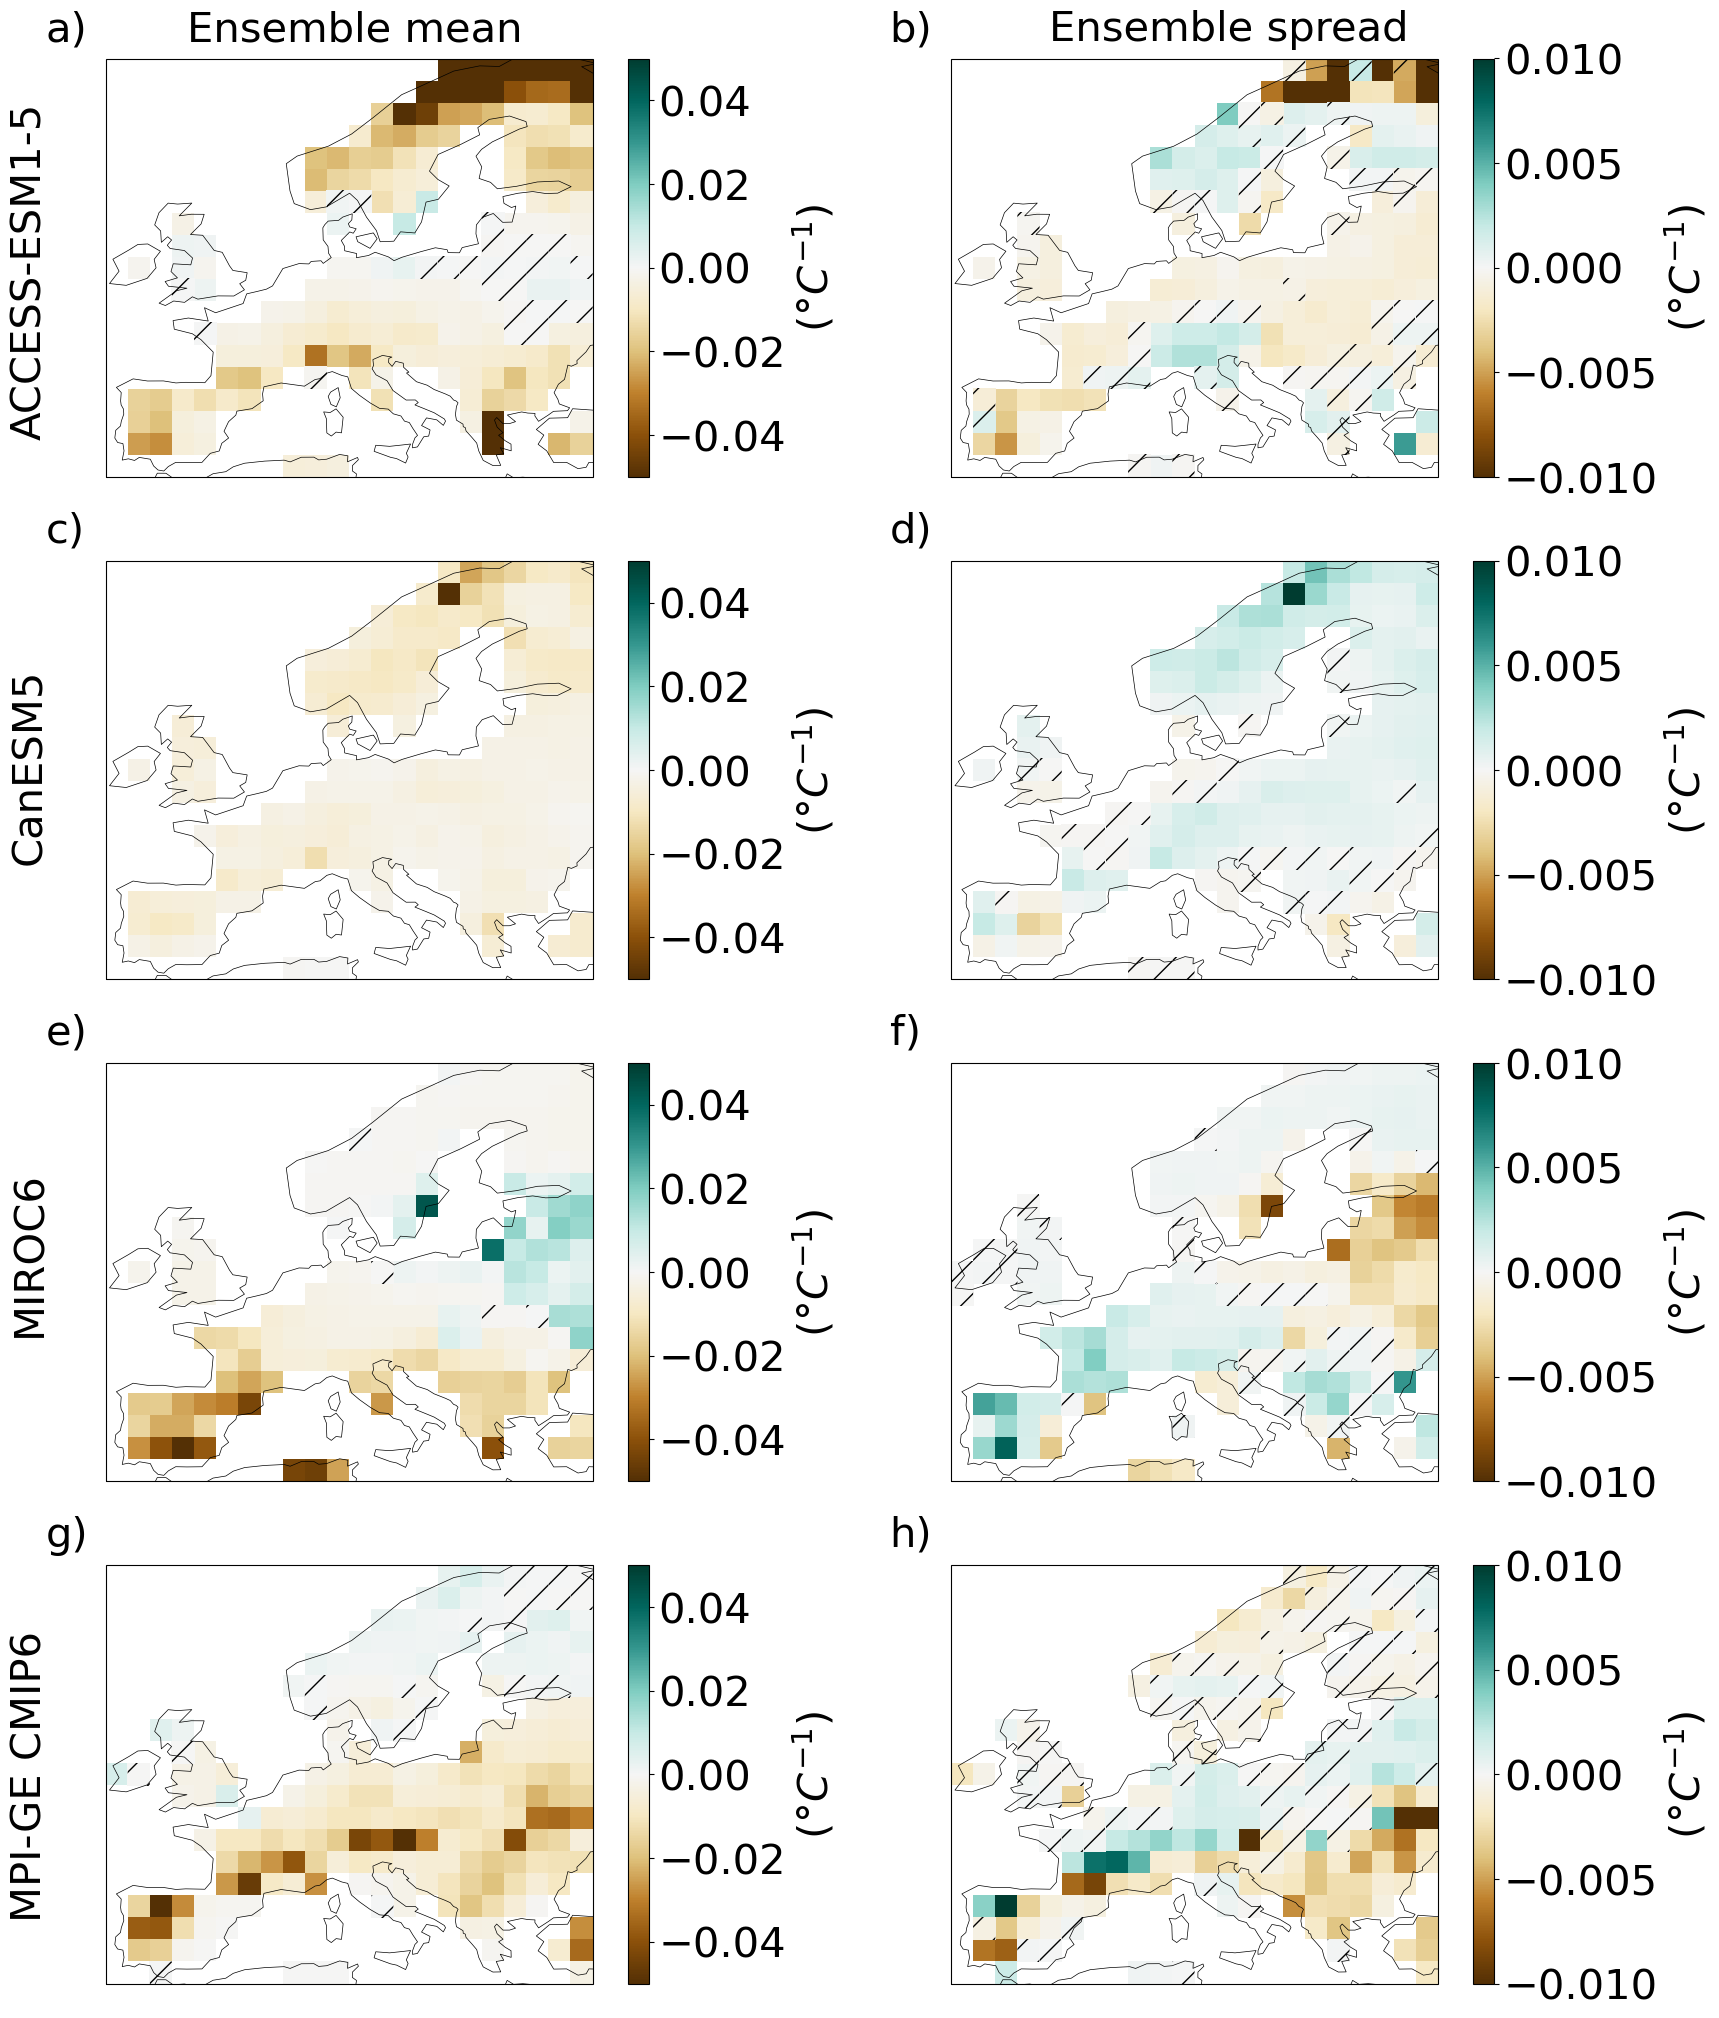

In [11]:
fig = plt.figure(figsize=(20,25))
plt.rcParams.update({'font.size': 30})
y_lim_min = -0.05
y_lim_max = 0.05
y_lim_min2 = -0.01
y_lim_max2 = 0.01

ax = fig.add_subplot(4,2,1, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,sm_mean_ens_mean_regress_access,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
plt.pcolor(sm_plot.lon,sm_plot.lat,hatch_mean_mean_access,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')

ax = fig.add_subplot(4,2,2, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,sm_mean_ens_std_regress_access,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.pcolor(sm_plot.lon,sm_plot.lat,hatch_mean_std_access,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')

ax = fig.add_subplot(4,2,3, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,sm_mean_ens_mean_regress_canesm,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
plt.pcolor(sm_plot.lon,sm_plot.lat,hatch_mean_mean_canesm,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')

ax = fig.add_subplot(4,2,4, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,sm_mean_ens_std_regress_canesm,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.pcolor(sm_plot.lon,sm_plot.lat,hatch_mean_std_canesm,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')

ax = fig.add_subplot(4,2,5, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,sm_mean_ens_mean_regress_miroc,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
plt.pcolor(sm_plot.lon,sm_plot.lat,hatch_mean_mean_miroc,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')
#plt.title('Foced signal')

ax = fig.add_subplot(4,2,6, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,sm_mean_ens_std_regress_miroc,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.pcolor(sm_plot.lon,sm_plot.lat,hatch_mean_std_miroc,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')

ax = fig.add_subplot(4,2,7, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,sm_mean_ens_mean_regress_mpi,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
plt.pcolor(sm_plot.lon,sm_plot.lat,hatch_mean_mean_mpi,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')
#plt.title('Foced signal')

ax = fig.add_subplot(4,2,8, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,sm_mean_ens_std_regress_mpi,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.pcolor(sm_plot.lon,sm_plot.lat,hatch_mean_std_mpi,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')

##model names
#plt.text(-112,180,'ACCESS-ESM1-5')
#plt.text(-105,137,'CanESM5')
#plt.text(-105,95,'MIROC6')
#plt.text(-103,53,'MPI-GE')

#model names
plt.text(-90,167,'ACCESS-ESM1-5',rotation='vertical')
plt.text(-90,131,'CanESM5',rotation='vertical')
plt.text(-90,91,'MIROC6',rotation='vertical')
plt.text(-90,41.5,'MPI-GE CMIP6',rotation='vertical')

plt.text(-75,200,'Ensemble mean')
plt.text(-2,200,'Ensemble spread')

plt.text(-87,200,'a)')
plt.text(-15.5,200,'b)')
plt.text(-87,157.5,'c)')
plt.text(-15.5,157.5,'d)')
plt.text(-87,115,'e)')
plt.text(-15.5,115,'f)')
plt.text(-87,72.5,'g)')
plt.text(-15.5,72.5,'h)')

plt.savefig(plot_path + 'FINAL_SMILE_fig_5',bbox_inches="tight",dpi=300) #dpi=600)

In [12]:
#Averages
sm_mean_ens_mean_regress_all = (sm_mean_ens_mean_regress_mpi + sm_mean_ens_mean_regress_miroc + sm_mean_ens_mean_regress_access + sm_mean_ens_mean_regress_canesm)/4
sm_mean_ens_std_regress_all = (sm_mean_ens_std_regress_mpi + sm_mean_ens_std_regress_miroc + sm_mean_ens_std_regress_access + sm_mean_ens_std_regress_canesm)/4

In [13]:
#significan when 3 or more models agree on sign
mpi_mean_binary = np.where(sm_mean_ens_mean_regress_mpi>0,1,0)
canesm_mean_binary = np.where(sm_mean_ens_mean_regress_canesm>0,1,0)
miroc_mean_binary = np.where(sm_mean_ens_mean_regress_miroc>0,1,0)
access_mean_binary = np.where(sm_mean_ens_mean_regress_access>0,1,0)

mean_binary = mpi_mean_binary + canesm_mean_binary + miroc_mean_binary + access_mean_binary
mean_binary = np.where((mean_binary>=3)|(mean_binary<=1),1,0)
joker = np.where(np.isnan(sm_mean_ens_mean_regress_mpi),np.nan,mean_binary)
mean_binary_hatch_sign = np.ma.masked_greater(joker, 0.05)
mean_binary_hatch_sign.data[:,:] = np.where(np.isnan(sm_mean_ens_mean_regress_mpi),np.nan,sm_mean_ens_mean_regress_all[:,:])

mpi_std_binary = np.where(sm_mean_ens_std_regress_mpi>0,1,0)
canesm_std_binary = np.where(sm_mean_ens_std_regress_canesm>0,1,0)
miroc_std_binary = np.where(sm_mean_ens_std_regress_miroc>0,1,0)
access_std_binary = np.where(sm_mean_ens_std_regress_access>0,1,0)

std_binary = mpi_std_binary + canesm_std_binary + miroc_std_binary + access_std_binary
std_binary = np.where((std_binary>=3)|(std_binary<=1),1,0)
joker = np.where(np.isnan(sm_mean_ens_mean_regress_mpi),np.nan,std_binary)
std_binary_hatch_sign = np.ma.masked_greater(joker, 0.05)
std_binary_hatch_sign.data[:,:] = np.where(np.isnan(sm_mean_ens_mean_regress_mpi),np.nan,sm_mean_ens_std_regress_all[:,:])

In [15]:
#significan when 3 or more models are significant
access_mean_binary = np.where(hatch_mean_mean_access.mask,1,0)
canesm_mean_binary = np.where(hatch_mean_mean_canesm.mask,1,0)
miroc_mean_binary = np.where(hatch_mean_mean_miroc.mask,1,0)
mpi_mean_binary = np.where(hatch_mean_mean_mpi.mask,1,0)

mean_binary = mpi_mean_binary + canesm_mean_binary + miroc_mean_binary + access_mean_binary
mean_binary = np.where((mean_binary>=3),1,0)
joker = np.where(np.isnan(sm_mean_ens_mean_regress_mpi),np.nan,mean_binary)
mean_binary_hatch_test = np.ma.masked_greater(joker, 0.05)
mean_binary_hatch_test.data[:,:] = np.where(np.isnan(sm_mean_ens_mean_regress_mpi),np.nan,sm_mean_ens_mean_regress_all[:,:])

mpi_std_binary = np.where(hatch_mean_std_mpi.mask,1,0)
canesm_std_binary = np.where(hatch_mean_std_canesm.mask,1,0)
miroc_std_binary = np.where(hatch_mean_std_miroc.mask,1,0)
access_std_binary = np.where(hatch_mean_std_access.mask,1,0)

std_binary = mpi_std_binary + canesm_std_binary + miroc_std_binary + access_std_binary
std_binary = np.where((std_binary>=3),1,0)
joker = np.where(np.isnan(sm_mean_ens_mean_regress_mpi),np.nan,std_binary)
std_binary_hatch_test = np.ma.masked_greater(joker, 0.05)
std_binary_hatch_test.data[:,:] = np.where(np.isnan(sm_mean_ens_mean_regress_mpi),np.nan,sm_mean_ens_std_regress_all[:,:])

In [17]:
#significant with three models agreeing sign and being significant
mean_binary_hatch_combine = np.where((mean_binary_hatch_test.mask==1) & (mean_binary_hatch_sign.mask==1),1,0).astype(float)
mean_binary_hatch_combine = np.ma.masked_greater(mean_binary_hatch_combine, 0.05)
mean_binary_hatch_combine.data[:,:] = np.where(np.isnan(sm_mean_ens_mean_regress_mpi),np.nan,sm_mean_ens_mean_regress_all[:,:])

std_binary_hatch_combine = np.where((std_binary_hatch_test.mask==1) & (std_binary_hatch_sign.mask==1),1,0).astype(float)
std_binary_hatch_combine = np.ma.masked_greater(std_binary_hatch_combine, 0.05)
std_binary_hatch_combine.data[:,:] = np.where(np.isnan(sm_mean_ens_mean_regress_mpi),np.nan,sm_mean_ens_std_regress_all[:,:])

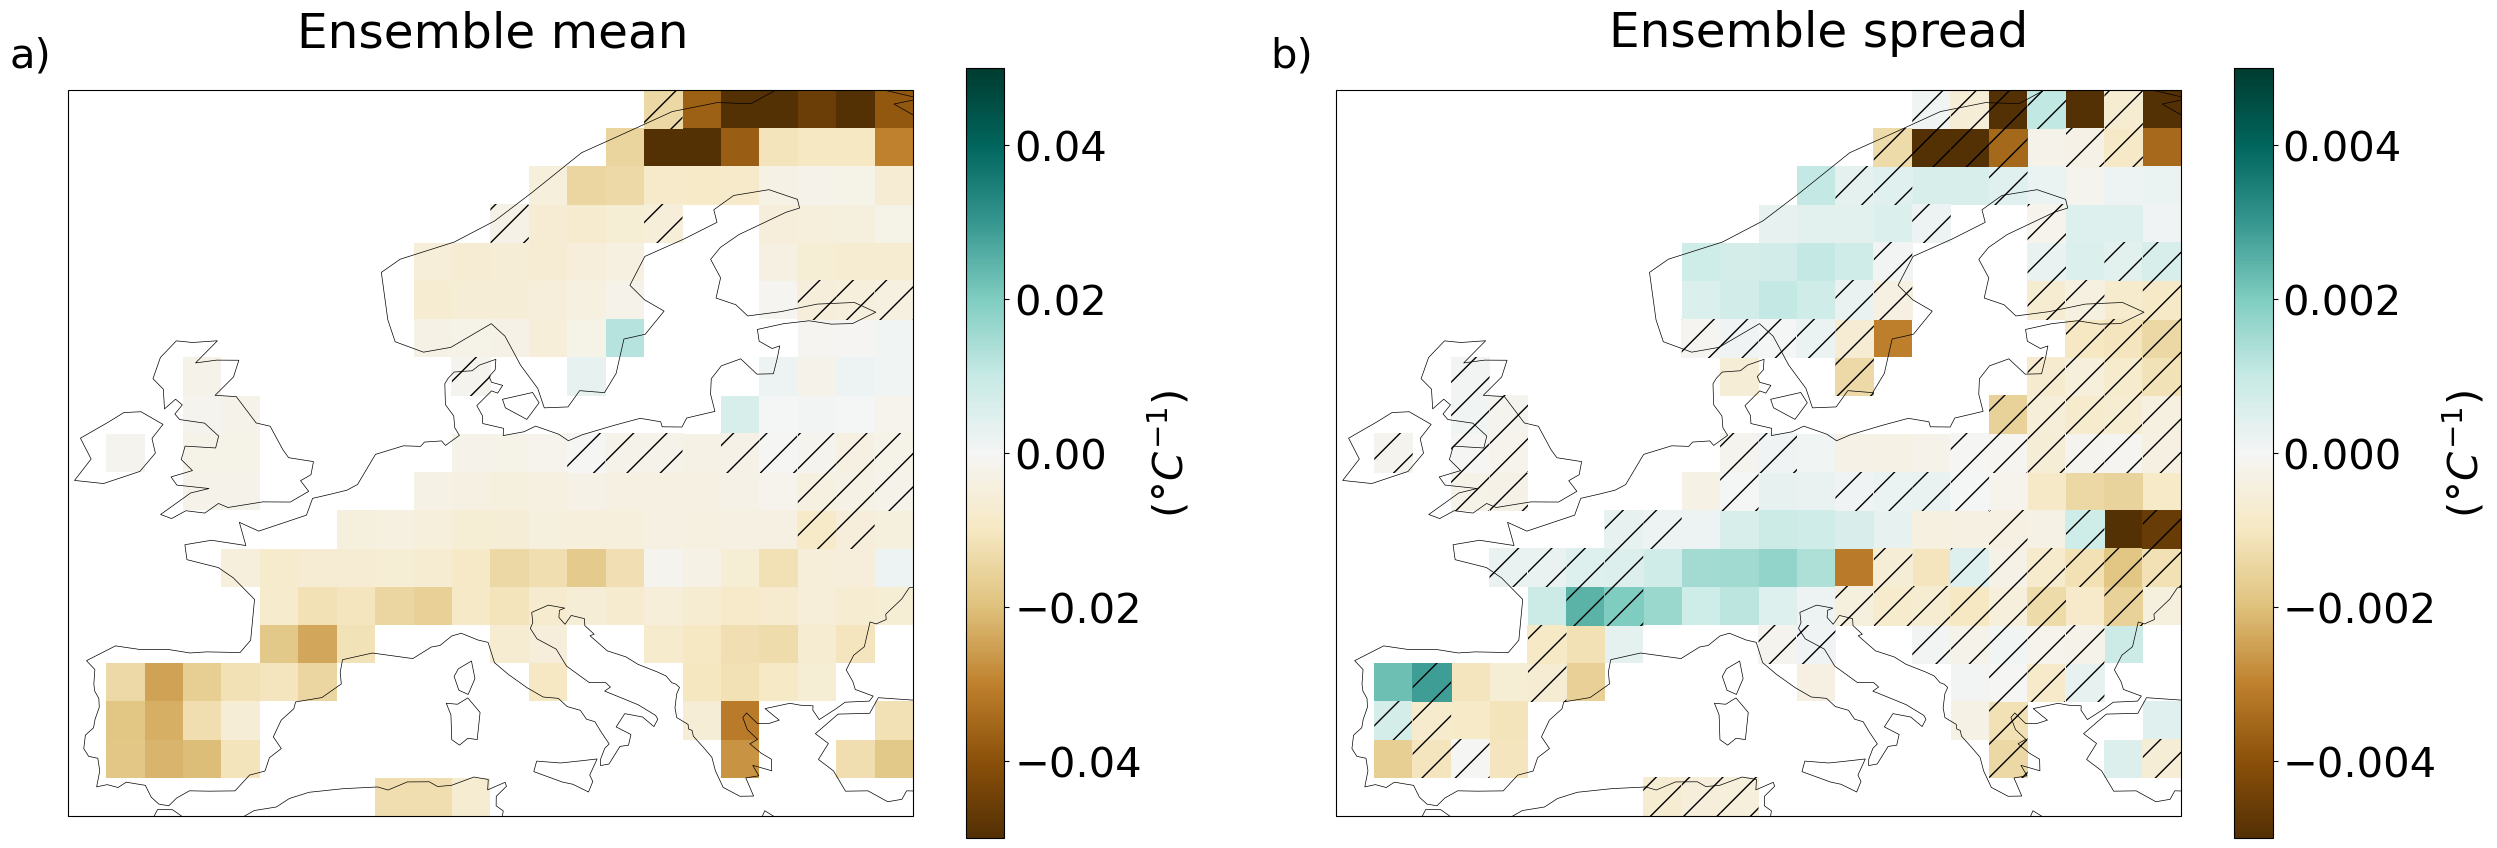

In [19]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 30})
y_lim_min = -0.05
y_lim_max = 0.05
y_lim_min2 = -0.005
y_lim_max2 = 0.005

ax = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,sm_mean_ens_mean_regress_all,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
plt.pcolor(sm_plot.lon,sm_plot.lat,mean_binary_hatch_combine,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')
#plt.title('Foced signal')

ax = fig.add_subplot(1,2,2, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,sm_mean_ens_std_regress_all,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.pcolor(sm_plot.lon,sm_plot.lat,std_binary_hatch_combine,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')
#plt.title('Internal variability uncertainty')

#add plot reference
plt.text(-75,72,'a)',fontsize=30)
plt.text(-13.5,72,'b)',fontsize=30)

plt.text(-61,73,'Ensemble mean',fontsize=35)
plt.text(3,73,'Ensemble spread',fontsize=35)

plt.savefig(plot_path + 'FINAL_SMILE_MEAN_fig_5',bbox_inches="tight",dpi=300) #dpi=600)

In [20]:
# scale to early historical period mean and std
path='/work/uo1075/u241308/data_python_PostDoc/HW_expansion/soil_moisture_smile/'
file='SM_JJA_Europe_%i-%i_ens_mean_'%(ref_hist_min,ref_hist_max) + 'CanESM5.nc'
sm_mean_ref_CanESM5 = xr.open_dataset(path+file).mrso
file='SM_JJA_Europe_%i-%i_ens_std_'%(ref_hist_min,ref_hist_max) + 'CanESM5.nc'
sm_std_ref_CanESM5 = xr.open_dataset(path+file).mrso

file='SM_JJA_Europe_%i-%i_ens_mean_'%(ref_hist_min,ref_hist_max) + 'MIROC6.nc'
sm_mean_ref_MIROC6 = xr.open_dataset(path+file).mrso
file='SM_JJA_Europe_%i-%i_ens_std_'%(ref_hist_min,ref_hist_max) + 'MIROC6.nc'
sm_std_ref_MIROC6 = xr.open_dataset(path+file).mrso

file='SM_JJA_Europe_%i-%i_ens_mean_'%(ref_hist_min,ref_hist_max) + 'ACCESS-ESM1-5.nc'
sm_mean_ref_ACCESS = xr.open_dataset(path+file).mrso
file='SM_JJA_Europe_%i-%i_ens_std_'%(ref_hist_min,ref_hist_max) + 'ACCESS-ESM1-5.nc'
sm_std_ref_ACCESS = xr.open_dataset(path+file).mrso

path='/work/uo1075/u241308/data_python_PostDoc/HW_expansion/soil_moisture_smile/'
file='SM_JJA_Europe_%i-%i_ens_mean_'%(ref_hist_min,ref_hist_max) + 'MPI-GE.nc'
sm_mean_ref_MPI = xr.open_dataset(path+file).mrso
file='SM_JJA_Europe_%i-%i_ens_std_'%(ref_hist_min,ref_hist_max) + 'MPI-GE.nc'
sm_std_ref_MPI = xr.open_dataset(path+file).mrso

Text(-15.5, 72.5, 'h)')

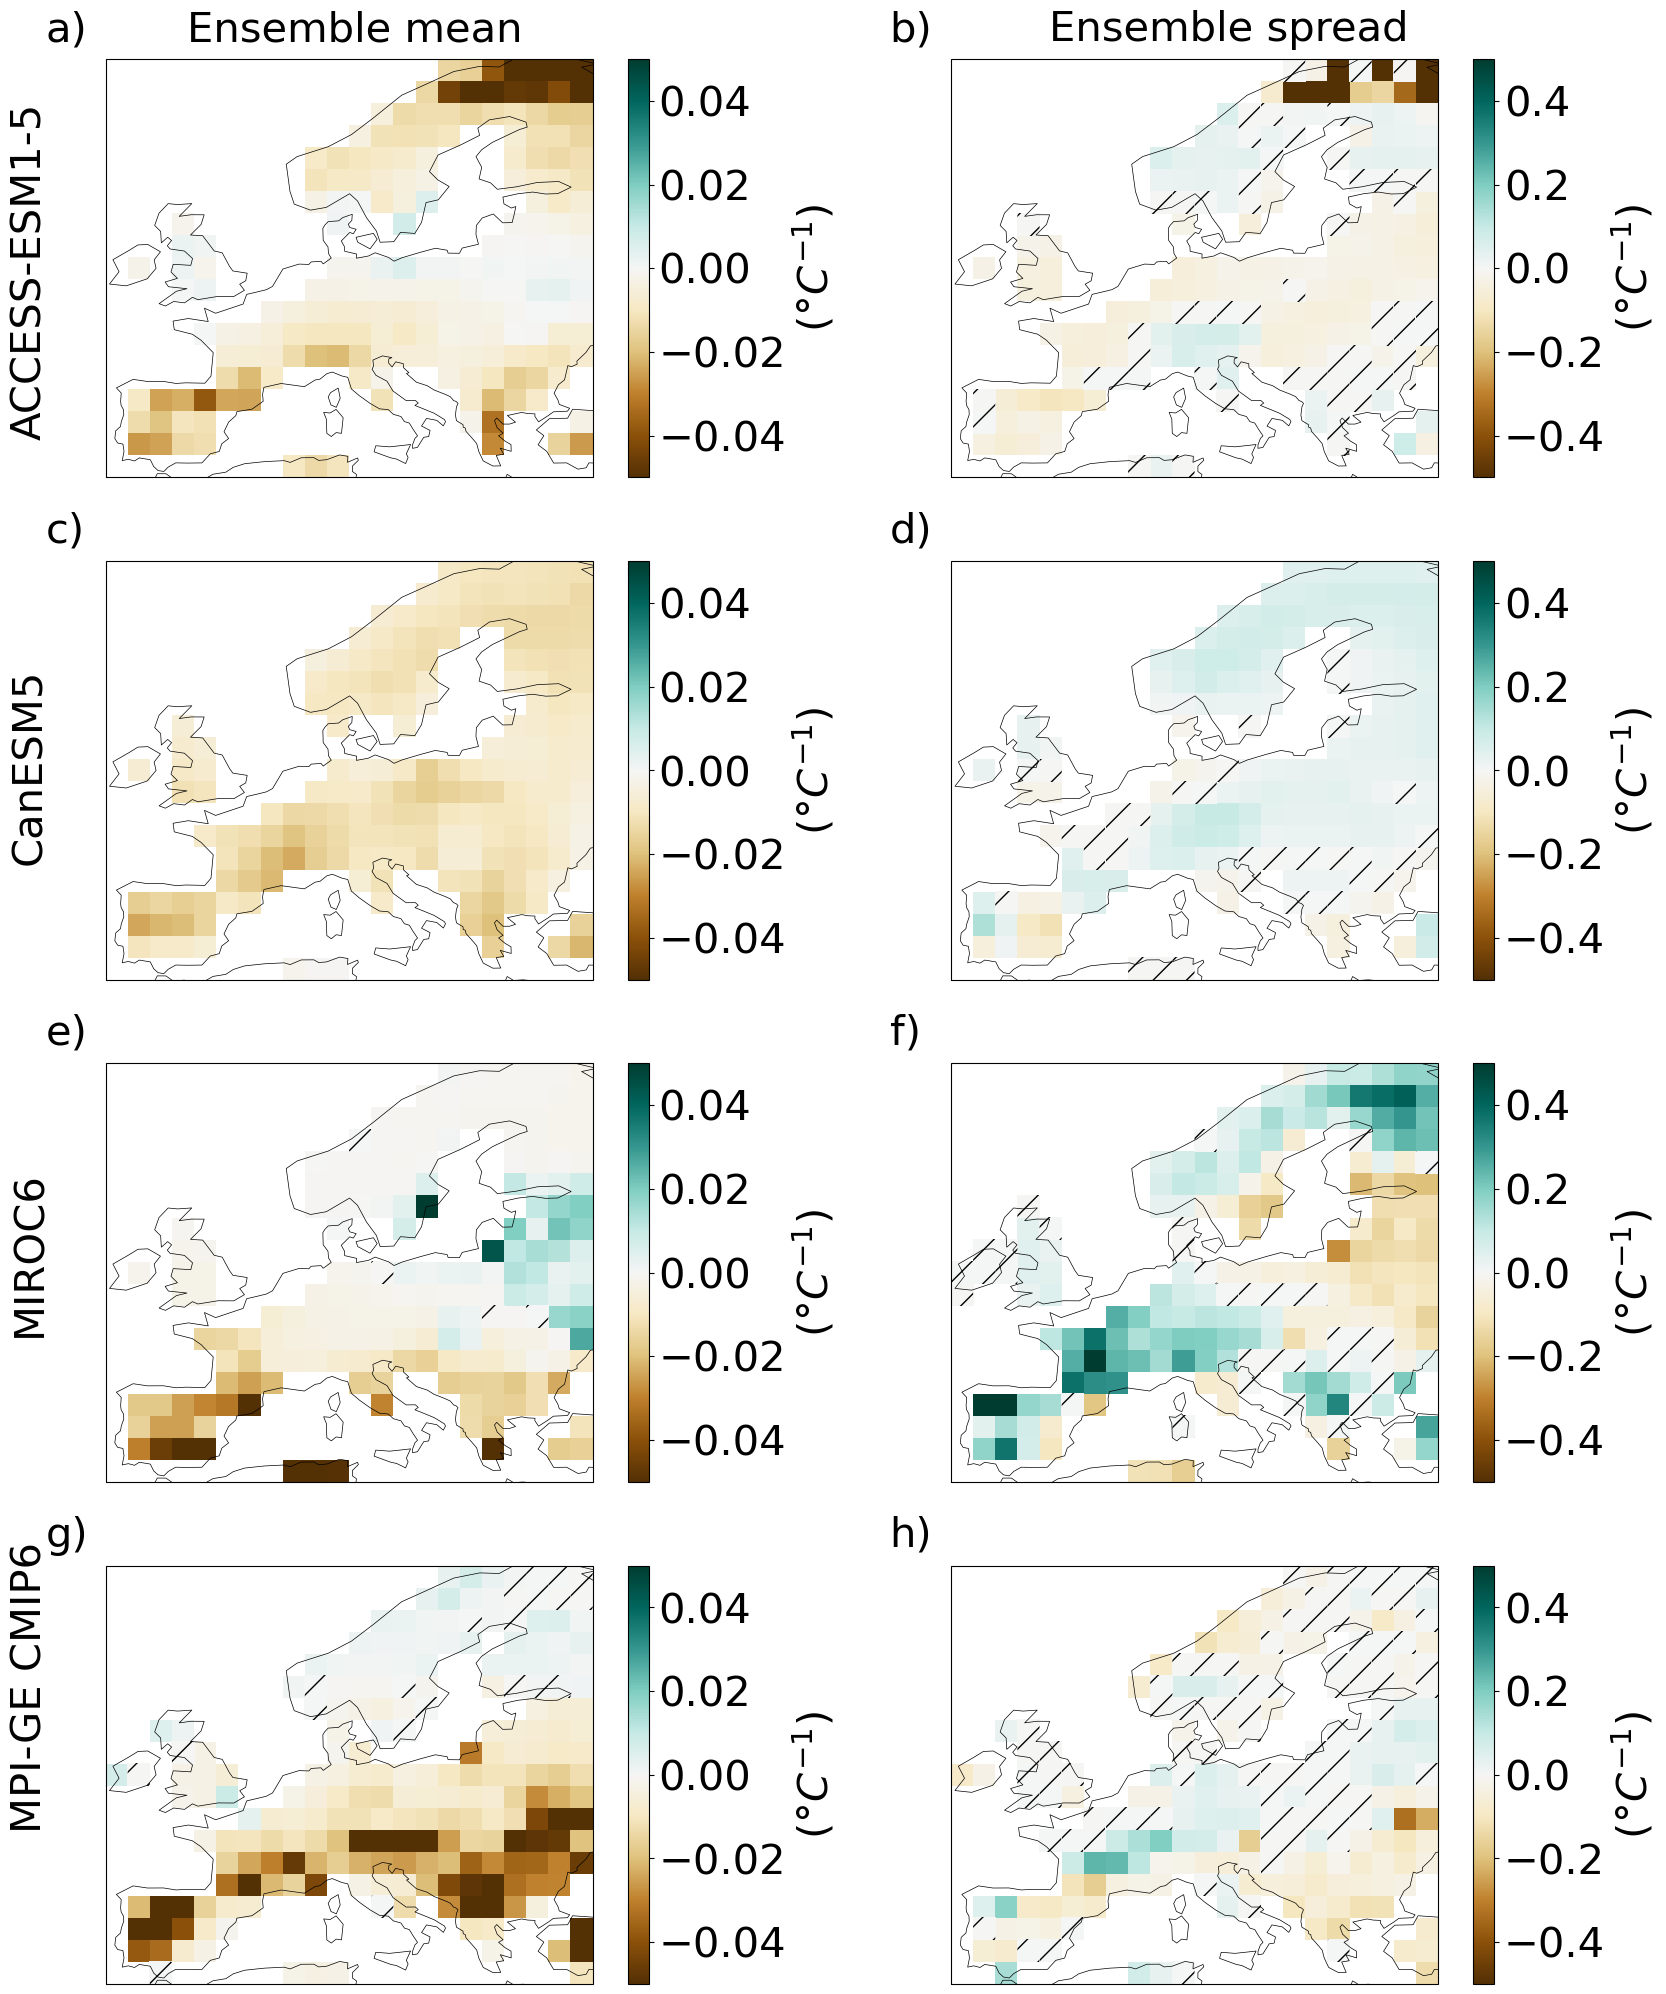

In [21]:
fig = plt.figure(figsize=(20,25))
plt.rcParams.update({'font.size': 30})
y_lim_min = -0.05
y_lim_max = 0.05
y_lim_min2 = -0.5
y_lim_max2 = 0.5

joker = sm_mean_ens_mean_regress_access/sm_mean_ref_ACCESS 
ax = fig.add_subplot(4,2,1, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,joker,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
#plt.pcolor(sm_plot.lon,sm_plot.lat,hatch_mean_mean_access,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')

joker = sm_mean_ens_std_regress_access/sm_std_ref_ACCESS 
ax = fig.add_subplot(4,2,2, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,joker,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.pcolor(sm_plot.lon,sm_plot.lat,hatch_mean_std_access,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')

joker = sm_mean_ens_mean_regress_canesm/sm_mean_ref_CanESM5 
ax = fig.add_subplot(4,2,3, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,joker,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
plt.pcolor(sm_plot.lon,sm_plot.lat,hatch_mean_mean_canesm,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')

joker = sm_mean_ens_std_regress_canesm/sm_std_ref_CanESM5 
ax = fig.add_subplot(4,2,4, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,joker,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.pcolor(sm_plot.lon,sm_plot.lat,hatch_mean_std_canesm,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')

joker = sm_mean_ens_mean_regress_miroc/sm_mean_ref_MIROC6 
ax = fig.add_subplot(4,2,5, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,joker,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
plt.pcolor(sm_plot.lon,sm_plot.lat,hatch_mean_mean_miroc,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')
#plt.title('Foced signal')

joker = sm_mean_ens_std_regress_miroc/sm_std_ref_MIROC6 
ax = fig.add_subplot(4,2,6, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,joker,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.pcolor(sm_plot.lon,sm_plot.lat,hatch_mean_std_miroc,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')

joker = sm_mean_ens_mean_regress_mpi/sm_mean_ref_MPI 
ax = fig.add_subplot(4,2,7, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,joker,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
plt.pcolor(sm_plot.lon,sm_plot.lat,hatch_mean_mean_mpi,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')
#plt.title('Foced signal')

joker = sm_mean_ens_std_regress_mpi/sm_std_ref_MPI 
ax = fig.add_subplot(4,2,8, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,joker,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.pcolor(sm_plot.lon,sm_plot.lat,hatch_mean_std_mpi,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')

##model names
#plt.text(-112,180,'ACCESS-ESM1-5')
#plt.text(-105,137,'CanESM5')
#plt.text(-105,95,'MIROC6')
#plt.text(-103,53,'MPI-GE')

#model names
plt.text(-90,167,'ACCESS-ESM1-5',rotation='vertical')
plt.text(-90,131,'CanESM5',rotation='vertical')
plt.text(-90,91,'MIROC6',rotation='vertical')
plt.text(-90,49,'MPI-GE CMIP6',rotation='vertical')

plt.text(-75,200,'Ensemble mean')
plt.text(-2,200,'Ensemble spread')

plt.text(-87,200,'a)')
plt.text(-15.5,200,'b)')
plt.text(-87,157.5,'c)')
plt.text(-15.5,157.5,'d)')
plt.text(-87,115,'e)')
plt.text(-15.5,115,'f)')
plt.text(-87,72.5,'g)')
plt.text(-15.5,72.5,'h)')

#plt.savefig(plot_path + 'FINAL_SMILE_fig_5_scaled',bbox_inches="tight",dpi=300) #dpi=600)

In [22]:
#Averages scaled
sm_mean_ens_mean_regress_all_scaled = ((sm_mean_ens_mean_regress_mpi/sm_mean_ref_MPI).values + (sm_mean_ens_mean_regress_miroc/sm_mean_ref_MIROC6).values + (sm_mean_ens_mean_regress_access/sm_mean_ref_ACCESS).values + (sm_mean_ens_mean_regress_canesm/sm_mean_ref_CanESM5).values)/4
sm_mean_ens_std_regress_all_scaled = ((sm_mean_ens_std_regress_mpi/sm_std_ref_MPI).values + (sm_mean_ens_std_regress_miroc/sm_std_ref_MIROC6).values + (sm_mean_ens_std_regress_access/sm_std_ref_ACCESS).values + (sm_mean_ens_std_regress_canesm/sm_std_ref_CanESM5).values)/4

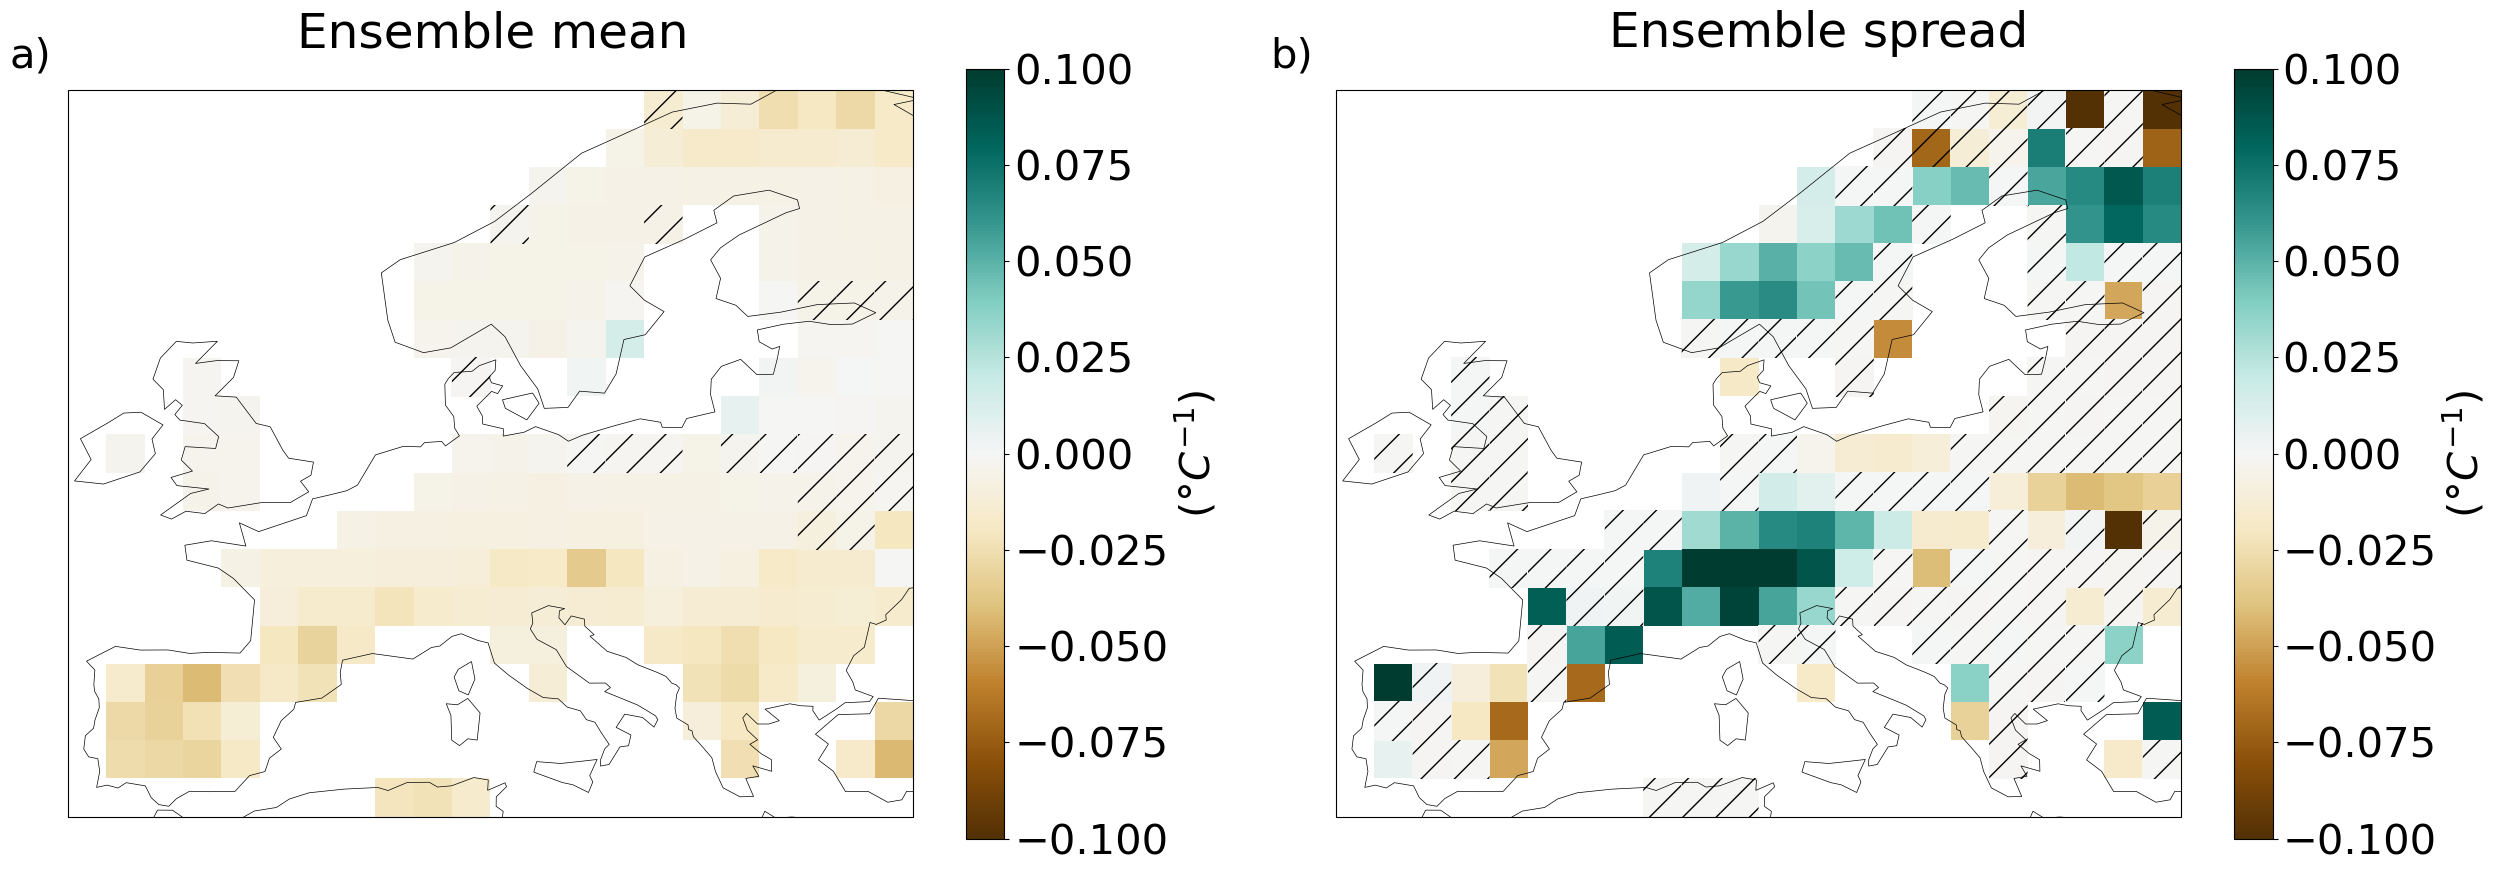

In [23]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 30})
y_lim_min = -0.1
y_lim_max = 0.1
y_lim_min2 = -0.1
y_lim_max2 = 0.1

ax = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,sm_mean_ens_mean_regress_all_scaled,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
plt.pcolor(sm_plot.lon,sm_plot.lat,mean_binary_hatch_combine,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min,vmax=y_lim_max)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')
#plt.title('Foced signal')

ax = fig.add_subplot(1,2,2, projection=ccrs.PlateCarree())
plt.pcolormesh(sm_plot.lon,sm_plot.lat,sm_mean_ens_std_regress_all_scaled,cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.pcolor(sm_plot.lon,sm_plot.lat,std_binary_hatch_combine,hatch='/',cmap=plt.cm.get_cmap('BrBG'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.colorbar(label='($°C^{-1}$)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')
#plt.title('Internal variability uncertainty')

#add plot reference
plt.text(-75,72,'a)',fontsize=30)
plt.text(-13.5,72,'b)',fontsize=30)

plt.text(-61,73,'Ensemble mean',fontsize=35)
plt.text(3,73,'Ensemble spread',fontsize=35)

plt.savefig(plot_path + 'FINAL_SMILE_MEAN_fig_5_scaled',bbox_inches="tight",dpi=300) #dpi=600)